# Introduction
State notebook purpose here

## Notebook configuration
Configure several notebook configuration settings.

In [1]:
# Disable some warnings

import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)
warnings.filterwarnings('ignore', category = FutureWarning)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

# Use full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

## Libraries / Packages
Import several useful packages for the notebook and configure some extra options.

In [2]:
# Miscellaneous libraries
import copy
import numpy as np
import pandas as pd
import networkx as nx

from tqdm.notebook import tqdm
from collections import defaultdict, Counter

# Setup some options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100


# Visualization
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

# Something
Here follows something...

In [41]:
#{k : min(i for i in (h1.get(k), h2.get(k)) if i) for k in h1.keys() | h2}

d1 = {'a': 0, 'b': 1, 'c': 2}
d2 = {'a': 2, 'b': 2, 'd': 34}
d3 = {'a': 4, 'e': 1, 'x': 33}
d4 = {'a': 3, 'f': 2, 'w': 23}

d2 = {k: v + 1 for k, v in d2.items()}

d = {k: int(np.nanmin([d1.get(k, np.nan), d2.get(k, np.nan)])) for k in d1.keys() | d2}
print(d)


{'c': 2, 'a': 0, 'b': 1, 'd': 35}


In [37]:
# Generate a random graph with 100 nodes
g = nx.gnp_random_graph(100, 0.4, seed=347, directed=False)

nx.to_numpy_array(g)

array([[0., 1., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

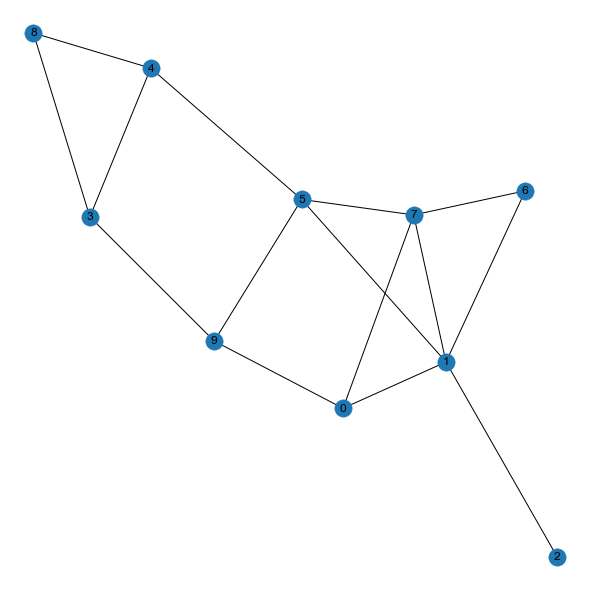

Adjacenty matrix:
------------------------------
[[0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]

Adjacency list:
------------------------------
{0: [1, 7, 9], 1: [0, 2, 5, 6, 7], 2: [1], 3: [4, 8, 9], 4: [3, 5, 8], 5: [1, 4, 7, 9], 6: [1, 7], 7: [0, 1, 5, 6], 8: [3, 4], 9: [0, 3, 5]}


In [102]:
'''
def add1Step(subtree):
    ''''''
    return {k: v + 1 for k, v in subtree.items()}

def digestMessage(v, neighbors):
    ''''''
    # Add 1 extra step to all neighbors' messages (subtrees)
    neighbors = [add1Step(u) for u in neighbors]
    # Append the node itself to the list
    neighbors.append(v)
    # Merge all the info
    return {
        k: int(np.nanmin([u.get(k, np.nan) for u in neighbors])) 
        for k in set().union(*neighbors)
    }
    
'''

# Parameters for the Erdos-Renyi random graph
n = 10
p = 0.4
seed = 347

G = nx.gnp_random_graph(n, p, seed=seed, directed=False)

# Draw the generated graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True)
plt.show()

print('Adjacenty matrix:')
print('-' * 30)
A = nx.to_numpy_array(G)
print(A)

print()
print('Adjacency list:')
print('-' * 30)
adj_list = {k: list(v.keys()) for k, v in nx.to_dict_of_dicts(G).items()}
print(adj_list)

In [103]:
adj_list

{0: [1, 7, 9],
 1: [0, 2, 5, 6, 7],
 2: [1],
 3: [4, 8, 9],
 4: [3, 5, 8],
 5: [1, 4, 7, 9],
 6: [1, 7],
 7: [0, 1, 5, 6],
 8: [3, 4],
 9: [0, 3, 5]}

In [116]:
def digestMessage(root, neighbors):
    ''''''
    

# Init all trees -> just the root (i.e. the node themselves)
trees = [{0: (i, None)} for i in range(len(adj_list))]

# Maximum depth of the trees, i.e. number of layers of the message passing architecture
depth = 4

for d in range(1, depth + 1):
    trees_ = copy.deepcopy(trees)
    for i in range(len(adj_list)):
        # Add a new depth level with all the incoming subtrees
        trees[i][d] = [
            trees_[j][d - 1] if d != 1 else (trees_[j][d - 1][0], i)
            for j in adj_list[i]
        ]
        
print(trees[0])

{0: (0, None), 1: [(1, 0), (7, 0), (9, 0)], 2: [[(0, 1), (2, 1), (5, 1), (6, 1), (7, 1)], [(0, 7), (1, 7), (5, 7), (6, 7)], [(0, 9), (3, 9), (5, 9)]], 3: [[[(1, 0), (7, 0), (9, 0)], [(1, 2)], [(1, 5), (4, 5), (7, 5), (9, 5)], [(1, 6), (7, 6)], [(0, 7), (1, 7), (5, 7), (6, 7)]], [[(1, 0), (7, 0), (9, 0)], [(0, 1), (2, 1), (5, 1), (6, 1), (7, 1)], [(1, 5), (4, 5), (7, 5), (9, 5)], [(1, 6), (7, 6)]], [[(1, 0), (7, 0), (9, 0)], [(4, 3), (8, 3), (9, 3)], [(1, 5), (4, 5), (7, 5), (9, 5)]]], 4: [[[[(0, 1), (2, 1), (5, 1), (6, 1), (7, 1)], [(0, 7), (1, 7), (5, 7), (6, 7)], [(0, 9), (3, 9), (5, 9)]], [[(0, 1), (2, 1), (5, 1), (6, 1), (7, 1)]], [[(0, 1), (2, 1), (5, 1), (6, 1), (7, 1)], [(3, 4), (5, 4), (8, 4)], [(0, 7), (1, 7), (5, 7), (6, 7)], [(0, 9), (3, 9), (5, 9)]], [[(0, 1), (2, 1), (5, 1), (6, 1), (7, 1)], [(0, 7), (1, 7), (5, 7), (6, 7)]], [[(1, 0), (7, 0), (9, 0)], [(0, 1), (2, 1), (5, 1), (6, 1), (7, 1)], [(1, 5), (4, 5), (7, 5), (9, 5)], [(1, 6), (7, 6)]]], [[[(0, 1), (2, 1), (5, 1),

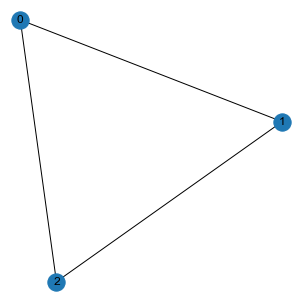

Adjacenty matrix:
------------------------------
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

Adjacency list:
------------------------------
[[1, 2], [0, 2], [0, 1]]


In [5]:
# Create the most basic graph for testing the algorithm
G = nx.Graph()
G.add_nodes_from([0, 1, 2])
G.add_edges_from([(0, 1), (0, 2), (1, 2)])

# Plot the graph
plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True)
plt.show()

print('Adjacenty matrix:')
print('-' * 30)
A = nx.to_numpy_array(G)
print(A)

print()
print('Adjacency list:')
print('-' * 30)
adj_list = {k: list(v.keys()) for k, v in nx.to_dict_of_dicts(G).items()}
adj_list = [list(v.keys()) for _, v in sorted(nx.to_dict_of_dicts(G).items())]
print(adj_list)

In [45]:
leaf_idxs_ = np.array([], np.int64)

leaf_idxs_ = np.concatenate((leaf_idxs_, np.arange(1, 12, 3) + 0 + 1))


print(leaf_idxs_.shape)

(4,)


In [33]:
def parseLeaves(leaves):
	'''

	Parameters:
		- leaves: (np.array)

	'''
	parsed = []
	for l in leaves:
		parsed.extend([-1, l, -2])
	return parsed

def computeRootedTreesNumba(adj_list, depth=3):
    ''''''
    rooted_trees = []
    for i in range(len(adj_list)):
        T = [-1, i, -2]
        leaf_idxs = [1]
        for _ in range(depth):
            offset = 0
            leaf_idxs_ = []
            for j in range(len(leaf_idxs)):
                idx = leaf_idxs[j] + offset
                print(idx)
                neighbors = adj_list[T[idx]]
                print(neighbors)
                new_chunk = parseLeaves(neighbors)
                print(new_chunk)
                leaf_idxs_.extend(np.arange(1, len(new_chunk), 3) + idx + 1)
                print(leaf_idxs_)
                T = np.concatenate((T[:idx + 1], new_chunk, T[idx + 1:]))
                print(T)
                offset += len(new_chunk)
            leaf_idxs = leaf_idxs_
        rooted_trees.append(T)
    return rooted_trees


prova = computeRootedTreesNumba([[1, 2], [0, 2], [0, 1]])

for p in prova:
    string = ''
    for element in p:
        if element == -1:
            string += '{'
        elif element == -2:
            string += '}'
        else:
            string += str(element)
    print(string)

1
[1, 2]
[-1, 1, -2, -1, 2, -2]
[3, 6]
[-1  0 -1  1 -2 -1  2 -2 -2]
3
[0, 2]
[-1, 0, -2, -1, 2, -2]
[5, 8]
[-1  0 -1  1 -1  0 -2 -1  2 -2 -2 -1  2 -2 -2]
12
[0, 1]
[-1, 0, -2, -1, 1, -2]
[5, 8, 14, 17]
[-1  0 -1  1 -1  0 -2 -1  2 -2 -2 -1  2 -1  0 -2 -1  1 -2 -2 -2]
5
[1, 2]
[-1, 1, -2, -1, 2, -2]
[7, 10]
[-1  0 -1  1 -1  0 -1  1 -2 -1  2 -2 -2 -1  2 -2 -2 -1  2 -1  0 -2 -1  1
 -2 -2 -2]
14
[0, 1]
[-1, 0, -2, -1, 1, -2]
[7, 10, 16, 19]
[-1  0 -1  1 -1  0 -1  1 -2 -1  2 -2 -2 -1  2 -1  0 -2 -1  1 -2 -2 -2 -1
  2 -1  0 -2 -1  1 -2 -2 -2]
26
[1, 2]
[-1, 1, -2, -1, 2, -2]
[7, 10, 16, 19, 28, 31]
[-1  0 -1  1 -1  0 -1  1 -2 -1  2 -2 -2 -1  2 -1  0 -2 -1  1 -2 -2 -2 -1
  2 -1  0 -1  1 -2 -1  2 -2 -2 -1  1 -2 -2 -2]
35
[0, 2]
[-1, 0, -2, -1, 2, -2]
[7, 10, 16, 19, 28, 31, 37, 40]
[-1  0 -1  1 -1  0 -1  1 -2 -1  2 -2 -2 -1  2 -1  0 -2 -1  1 -2 -2 -2 -1
  2 -1  0 -1  1 -2 -1  2 -2 -2 -1  1 -1  0 -2 -1  2 -2 -2 -2 -2]
1
[0, 2]
[-1, 0, -2, -1, 2, -2]
[3, 6]
[-1  1 -1  0 -2 -1  2 -2 -2]
3
[1, 2]
[

In [48]:
n = 100
prova = np.arange(n)
np.random.shuffle(prova)
prova

array([ 5, 28, 49, 88, 73, 46, 25,  0, 41, 45, 83, 82, 57, 65, 62, 15, 20,
       29, 21, 54, 56, 94, 89, 93, 78, 22,  2, 58, 32, 99,  4, 13, 96, 61,
       91, 23, 33, 42, 71, 51,  6, 52, 38, 67, 44, 12, 70, 27, 39,  7, 66,
       26, 36, 98, 68, 35, 48, 55, 64, 95, 37, 97, 17, 14, 18, 77, 81, 43,
       76, 86, 90, 10, 19, 79, 59, 87, 84, 16, 75,  3, 63, 31, 60,  1,  8,
       30, 34, 72, 24, 53, 50, 40, 47, 92, 80, 11, 74, 69,  9, 85])

In [35]:
import re

def findLeaves(T):
    ''''''
    pattern = re.compile(r"\{\d+\}")
    return [
        (int(m.group(0).strip('{}')), m.span(0)) 
        for m in re.finditer(pattern, T)
    ]

#T = '{0{1{0}{2}}{2{0}{1}}}'
T = '{0}'
print(T)

depth = 3
trees = ['{' + str(i) + '}' for i in range(len(adj_list))]

for i, T in enumerate(trees):
    for d in range(depth):
        offset = 0
        for l in findLeaves(T):
            substring = '{' + '}{'.join([str(n) for n in adj_list[l[0]]]) + '}'
            T = T[:offset + l[1][1] - 1] + substring + T[offset + l[1][1] - 1:]
            offset += len(substring)
    trees[i] = T
    
trees

{0}


['{0{1{0{1}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}',
 '{1{0{1{0}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}',
 '{2{0{1{0}{2}}{2{0}{1}}}{1{0{1}{2}}{2{0}{1}}}}']

In [36]:
'{0{1{0{1}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}' == '{0{1{0{1}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}'

True

In [128]:
# Init all trees -> just the root (i.e. the node themselves)
trees = [{0: i} for i in range(len(adj_list))]

# Maximum depth of the trees, i.e. number of layers of the message passing architecture
depth = 3


for d in range(1, depth + 1):
    trees_ = copy.deepcopy(trees)
    for i in range(len(adj_list)):
        # Add a new depth level with all the incoming subtrees
        if d == 1:
            trees[i][d] = {i: adj_list[i]}
        else:
            trees[i][d] = {}
            for j in adj_list[i]:
                trees[i][d] = {**trees[i][d], **trees_[j][d - 1]}
        
print(trees[0])


{0: 0, 1: {0: [1, 2]}, 2: {1: [0, 2], 2: [0, 1]}, 3: {0: [1, 2], 2: [0, 1], 1: [0, 2]}}


In [130]:
prova = trees[0]



prova

{0: 0,
 1: {0: [1, 2]},
 2: {1: [0, 2], 2: [0, 1]},
 3: {0: [1, 2], 2: [0, 1], 1: [0, 2]}}

In [132]:
from zss import simple_distance, Node


c = Node('0', [])
b = Node('2', [])
a = Node('1', [])

x = Node('2', [c, b])
x

<zss.simple_tree.Node object at 0xa1e8bf590 2>

In [144]:
import re


pattern = re.compile(r"\{\d+\}")

T = '{0{1{0}{2}}{2{0}{1}}}'

#pattern.findall(T)

positions = [
    (m.start(0), m.end(0)) for m in re.finditer(pattern, T)
]


T[positions[0][0]:positions[0][1]]

'{0}'

In [151]:
from apted import APTED
from apted.helpers import Tree

In [156]:
t1 = Tree.from_text('{0{1{0}}{2{0}}}')
t2 = Tree.from_text('{1}')


prova = APTED(t1, t2)

In [157]:
prova.compute_edit_distance()

4

In [ ]:
# Init all trees -> just the root (i.e. the node themselves)
trees = [{0: i} for i in range(len(adj_list))]

# Maximum depth of the trees, i.e. number of layers of the message passing architecture
depth = 3


for d in range(1, depth + 1):
    trees_ = copy.deepcopy(trees)
    for i in range(len(adj_list)):
        # Add a new depth level with all the incoming subtrees
        if d == 1:
            trees[i][d] = {i: adj_list[i]}
        else:
            trees[i][d] = {}
            for j in adj_list[i]:
                trees[i][d] = {**trees[i][d], **trees_[j][d - 1]}
        
print(trees[0])


In [188]:
def findLeaves(T):
    ''''''
    pattern = re.compile(r"\{\d+\}")
    return [
        (int(m.group(0).strip('{}')), m.span(0)) 
        for m in re.finditer(pattern, T)
    ]

#T = '{0{1{0}{2}}{2{0}{1}}}'
T = '{0}'
print(T)

depth = 3
trees = ['{' + str(i) + '}' for i in range(len(adj_list))]

for i, T in enumerate(trees):
    for d in range(depth):
        offset = 0
        for l in findLeaves(T):
            substring = '{' + '}{'.join([str(n) for n in adj_list[l[0]]]) + '}'
            T = T[:offset + l[1][1] - 1] + substring + T[offset + l[1][1] - 1:]
            offset += len(substring)
        print(T)
    trees[i] = T
    
trees
    

{0}
{0{1}{2}}
{0{1{0}{2}}{2{0}{1}}}
{0{1{0{1}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}
{1{0}{2}}
{1{0{1}{2}}{2{0}{1}}}
{1{0{1{0}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}
{2{0}{1}}
{2{0{1}{2}}{1{0}{2}}}
{2{0{1{0}{2}}{2{0}{1}}}{1{0{1}{2}}{2{0}{1}}}}


['{0{1{0{1}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}',
 '{1{0{1{0}{2}}{2{0}{1}}}{2{0{1}{2}}{1{0}{2}}}}',
 '{2{0{1{0}{2}}{2{0}{1}}}{1{0{1}{2}}{2{0}{1}}}}']

In [189]:
def computeEditDistance(tree1, tree2):
    ''''''
    tree1 = Tree.from_text(tree1)
    tree2 = Tree.from_text(tree2)
    apted = APTED(tree1, tree2)
    return apted.compute_edit_distance()

In [196]:
re.sub('\d+', 'x', trees[0])

computeEditDistance(trees[0], trees[1])
computeEditDistance(re.sub('\d+', 'x', trees[0]), re.sub('\d+', 'x', trees[2]))

0

In [200]:
import os
import time
import pandas as pd

ts = time.time()

print(ts)

ts_ = pd.to_datetime(ts, unit='s', origin='unix')

print(ts_)

os.environ['TZ'] = 'Europe/Madrid'
time.tzset()

ts = time.time()
print(ts)
ts_ = pd.to_datetime(ts, unit='s', origin='unix')
print(ts_)

1618242986.62263
2021-04-12 15:56:26.622629881
1618242986.6284978
2021-04-12 15:56:26.628497839


## SIGN Transforms
---

In [1]:
import sys
import torch
import torch_geometric.transforms as T

from torch import nn
from torch_geometric.data import DataLoader

sys.path.append('../src')

from utils.convert import fromNetworkx2Torch
from utils.io import readPickle, writePickle

In [2]:
dataset_filename = '../data/synthetic/erdos_renyi/N300_n100_p0.1_1624629108/raw_networkx.pkl'
initial_relabeling = 'ones'

networkx_dataset = readPickle(dataset_filename)
torch_dataset = fromNetworkx2Torch(networkx_dataset, initial_relabeling=initial_relabeling)
#torch_dataset_loader = DataLoader(torch_dataset, batch_size=1)

In [3]:
K = 3

transform = T.Compose([T.NormalizeFeatures(), T.SIGN(K)])

In [14]:
transformed_torch_dataset = [transform(G) for G in torch_dataset]

transformed_torch_dataset_loader = DataLoader(transformed_torch_dataset, batch_size=1)

In [18]:
for data in transformed_torch_dataset_loader:
    xs = [data.x]
    xs += [data[f'x{i}'] for i in range(1, K + 1)]
    print(len(xs))

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [24]:
import numpy as np

repr1 = np.array([1, 2, 3])
repr2 = np.array([3, 2, 1])

np.where(repr1 == repr2, 1, 0)

array([0, 1, 0])

In [25]:
repr1 @ repr2

10

In [38]:
import torch.nn.functional as F


node_representations = torch.from_numpy(np.array([
    np.array([1., 2., 3., 4.]),
    np.array([4., 5., 6., 7.]),
    np.array([7., 8., 9., 10.]),
    np.array([1., 2., 3., 5.])
]))


F.pdist(node_representations, p=1)

tensor([12., 24.,  1., 12., 11., 23.], dtype=torch.float64)

In [40]:
from scipy.spatial.distance import pdist


In [35]:
w = np.array([1, 1, 1])
prova = np.array([np.array([1, 2, 1]), np.array([1, 1, 1]), np.array([1, 1, 1])])

pdist(prova, metric='hamming', w=w)

array([0.33333333, 0.33333333, 0.        ])

In [47]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])


pdist(a1, metric='minkowski', p=1)

array([9.])

In [48]:
prova = np.array([1, 0.5, 0.25])

hamming = np.array([0, 1, 1])


prova @ hamming

0.75

In [52]:
prova = np.array([
    np.array([1, 2, 3]),
    np.array([4, 5, 6]),
    np.array([7, 8, 9])
])

l = .5
L = 1 + l * prova

np.linalg.inv(L)

LinAlgError: Singular matrix

In [59]:
from scipy.sparse import csr_matrix

L = np.array([
    np.array([1., 2., 3.]),
    np.array([4., 5., 6.]),
    np.array([7., 8., 9.])
])

D = np.diag([0.5, 0.5, 0.5])
D = csr_matrix(D)

D[0, :]

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>